<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_3_1_1_analise_PM_Apm_vs_N_2D_fig_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PM FLAT REGION CALCULATION AND PLOTING THE RESULTS

In [ ]:
import math as mt
import numpy as np
from mpmath import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


#-------------------------------------------------------------------------------
Vpi_pm1  = 3  # Vpi of phase modulator
# PM fixed parameters values, these work in cascade configuration
ang1pm = 0;  Upm1   =  0;        Tpm1  =  (pi*Upm1/Vpi_pm1);
#-------------------------------------------------------------------------------

#Function to reduce the extreme components of the vector for SLs comparison-----
#The reduction is for a given number of central lines
def reduct_vector(up_act, vec_comb, up_new):
 # up_act = current vector size vec_comb
 a = int((up_act-up_new)/2)
 b = int(a + up_new)
 c = int((up_new-1)/2)
 ax_rang = range(-c,c+1)
 ax_new = list(ax_rang)
 new_vcomb = []
 for k in range(a,b):
  new_vcomb.append(vec_comb[k])

 return new_vcomb
#-------------------------------------------------------------------------------


(0, 0)


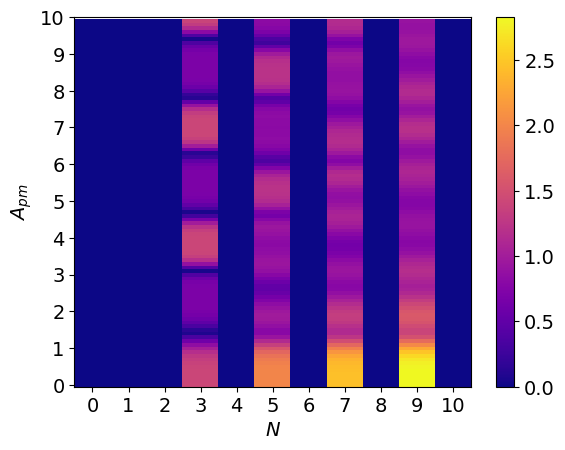

In [ ]:
up_n   =  15
top_n  =  int((up_n-1)/2)
ind_n  =  range(-top_n,top_n+1)
E2_pm  =  []


up_act          =  up_n
#length_flat     =  3    # quantidade de linhas comparadas
length_matrix   =  100   # tamanho maixmo da voltagem multiplicado x 10 em V, para usar 20V colocar 200
length_matrix_2 =  11   # defasagem do sinal modulante
limit_axis_xy   =  length_matrix/10  # used only for plot
limit_axis_xy_2 =  length_matrix_2/2
mx_st           =  np.zeros((length_matrix, length_matrix_2))


Tpm1 = 0

for iApm in range(length_matrix):  # Modulation amplitude signal
   for N in range(1,length_matrix_2,2):
      # var_Amz1b = var_Amz1a - pi/2;
        E2_pm     = []
        flat_cond = []
        temp2     = []
        pente_osa = []

        for n in ind_n:
            J_n_iApm = besselj(n,iApm/10)
            temp1    = J_n_iApm*exp(j*(n*ang1pm + Tpm1/10))
            temp    = (abs(temp1))**2
            E2_pm.append(temp)
            #print(temp)

        temp2     = [abs(k2) for k2 in E2_pm]
        pente_osa = np.square(temp2)
        flat_cond = reduct_vector(up_act, pente_osa, N)
        st_dev    = np.std(flat_cond)/np.mean(flat_cond)  # foi dividido pela média para o cálculo do fator de variação
        mx_st[iApm,N]= st_dev
        #print(N)


#print(mx_st)
posicao_min = np.unravel_index(mx_st.argmin(), mx_st.shape)
print(posicao_min)

# Plotando a matriz
fig, ax = plt.subplots()
cax = ax.imshow(mx_st, aspect='auto', cmap='plasma')  # Alterando o mapa de cores para 'viridis'

# Adicionando e configurando o colorbar com o mesmo mapa de cores
colorbar = plt.colorbar(cax, cmap='viridis')

# Configurando os ticks do eixo Y para mostrar apenas valores inteiros, ajustando para a escala de 0.1
# Como cada passo representa 0.1 e queremos mostrar apenas os inteiros, configuramos os ticks em intervalos de 10
# Estes são equivalentes a 0, 1, 2, ..., 5 no gráfico, multiplicados por 10 para a posição correta.
new_range  = length_matrix + 1

plt.yticks(np.arange(0, new_range, 10), labels=[str(int(i/10)) for i in np.arange(0, new_range, 10)])

# Invertendo o eixo Y para crescer de baixo para cima
plt.gca().invert_yaxis()

# Configurando os ticks do eixo X
plt.xticks(np.arange(0, length_matrix_2, 1))  # Exibir todos os rótulos de 0 a 10

# Adicionando rótulos aos eixos
plt.xlabel('$N$')
plt.ylabel('$A_{pm}$')
#plt.title('Visualização de Matriz 50x11')

# Mostrando o gráfico
plt.show()